<hr style='border: 1px solid black;'>
<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: center; color:purple;'> <b>Linguagem Natural parte 1:</b>  NLP com análise de sentimento</p>
<hr style='border: 1px solid black;'>

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b>1. Importando pandas, numpy</b></p>
<a href = "https://pandas.pydata.org/docs/" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Documentação Pandas </a>

<a href = "https://numpy.org/doc/stable/user/index.html" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Documentação Numpy </a>


In [1]:
import pandas as pd
import numpy as np

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b>1.1 Sobre os dados:</b></p>
    
<p><a href = 'https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr' style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>URL dos dados</a></p>
    
<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><img src="./img/movie2.jpg" width="840"></p>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Tal base consiste em aproximadamente 50 mil resenhas de filmes já classificadas como positivas ou negativas, mas em inglês. A pessoa que disponibilizou no kaggle traduziu, mesmo que uma tradução automática, para o português, disponível para uso.</p>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Quando temos dados rotulados podemos utilizar algoritmos de machine learning supervisionado para realizar a classificação de sentimento. Basicamente nos métodos supervisionados temos um "professor" (rótulos) que serve para avaliar a resposta (previsões) e assim o modelo vai se adaptando de acordo com as orientações dos "professor". Agora se não temos os dados rotulados podemos utilizar algoritmos de machine learning não supervisionados, ou seja, nesta forma de aprendizagem não temos o "professor" portanto o algoritmo utilizado terá que descobrir sozinho relações, padrões regularidades e categorias nos dados.

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Então caso os nossos dados não fossem rotulados com os sentimentos poderíamos utilizar técnicas de aprendizado não supervisionados para encontrar categorias que iriam representar o sentimento negativo e sentimento positivo. Ok, mas você pode se perguntar e se eu não quiser usar aprendizado não supervisionado, o que fazer?

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Neste caso podemos temos algumas saídas, a primeira é ler todos as resenhas e você mesmo classificar como positivo ou negativo e depois usar aprendizado supervisionado. Mais uma maneira é usar um modelo treinado com uma outra fonte de dados rotulados e aplica-lo para classificar os dados de interesse (Quando tiver que essa abordagem o ideal é buscar modelos treinados com base de dados mais similar possível com a que pretende classificar.
    

In [2]:
resenha = pd.read_csv('dados/imdb-reviews-pt-br.csv')

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b> 2. Visualizando os dados</b>

In [3]:
resenha.head(5)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
resenha.tail(5)

,id,text_en,text_pt,sentiment
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos


In [5]:
resenha.shape

(49459, 4)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Aparentemente os dados foram ordenados pela ordem de sentimento "negastivo" e depois "positivo".

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b>2.1 Renomeando colunas</b>
    

In [6]:
traducao = {'text_en': 'texto_ingles',
            'text_pt': 'texto_portugues',
            'sentiment': 'sentimento'}
resenha.rename(columns= traducao, inplace=True)

In [7]:
resenha.columns

Index(['id', 'texto_ingles', 'texto_portugues', 'sentimento'], dtype='object')

<p style='font-size: 22px; line-height: 2; margin: 5px 50px; text-align: justify; color:purple;'> <b> 3. Pré-processamento dos dados</b>

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b> 3.1 Tratamento de dados faltantes</b>

In [8]:
# Procurando dados faltantes
resenha.isna().sum()

id                 0
texto_ingles       0
texto_portugues    0
sentimento         0
dtype: int64

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Não possui dados faltantes.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b> 3.2 Criando variável dummy</b>
    
<a href = 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html' style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Documentação replace</a>
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Será modificado na coluna sentimento o valores, neg = 0 e pos = 1.

In [9]:
# Alterando para variável dicotomica  
classificacao = resenha['sentimento'].replace(['neg', 'pos'], [0,1])
classificacao 

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentimento, Length: 49459, dtype: int64

In [10]:
# Criando coluna com a alteração
resenha['classificacao'] = classificacao

In [11]:
# Verificando a coluna
resenha.head()

,id,texto_ingles,texto_portugues,sentimento,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>  4. Criando os *Datasets* de Treino e Teste </b></p>

<a style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"> Documentação </a>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Dados de Treino:</b>
Conforme podemos imaginar, dados de treino são os dados que serão apresentados ao algoritmo de machine learning para criação do modelo. Estes dados costumam representar cerca de 70% da totalidade dos dados. 
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Dados de Teste:</b>
Serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho real seja verificado. Estes dados costumam representar cerca de 30% da totalidade dos dados.

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Referência : https://didatica.tech/dados-de-treino-e-teste/</p>

In [12]:
from sklearn.model_selection import train_test_split

# Separando a variáveis dependente e as independentes
X = resenha['texto_portugues']
y = resenha['sentimento']

# Criando uma semente
SEED = 42

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>4.1 Criando modelo de Regressão *LogisticRegression* </b>

<a style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> Documentação </a>
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>A regressão logística é usada no aprendizado de máquina (ML) para ajudar a criar previsões precisas. É semelhante à regressão linear, exceto que, em vez de um resultado gráfico, a variável de destino é binária; o valor é 1 ou 0.
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Existem três tipos básicos de regressão logística:

<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Regressão logística binária: aqui, há apenas dois resultados possíveis para a resposta categórica. Como no exemplo acima - um aluno é aprovado ou reprovado.</li>
    
<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Regressão logística multinomial: é onde as variáveis de resposta podem incluir três ou mais variáveis, que não estarão em nenhuma ordem. Um exemplo é prever se os clientes de um restaurante preferem um certo tipo de comida - vegetariana, carne ou vegana.</li>
<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Regressão logística ordinal: Como a regressão multinomial, pode haver três ou mais variáveis. No entanto, há uma ordem que as medições seguem. Um exemplo é classificar um hotel em uma escala de 1 a 5.</li>

In [13]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Criando o modelo
regressao_logistica = LogisticRegression()

# Treinando o modelo
regressao_logistica.fit(X_train, y_train)

# Testando o modelo
acuracia = regressao_logistica.score(X_test, y_test) * 100


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'> Ele retornou uma mensagem de erro. A mensagem diz que "não foi possível converter string para float". Isso porque os nossos textos não estão da maneira como os modelos de Machine Learning conseguem interpretar. E é nesse ponto que o NLP entra, o <b>PLN (Processamento de Linguagem Natural)</b> é responsável pela realização desta interpretação, transformando o texto em algo legível para máquinas.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>5. Explorando dados textuais </b>

In [14]:
# Pegando um exemplo de filme negativo
print('Negativa \n')
print(resenha['texto_portugues'][189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [15]:
# Pegando um exemplo de filme positivo
print('Positiva \n')
print(resenha['texto_portugues'][49002])

Positiva 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Conhecer um pouco dos textos é importante, e irá nos ajudar a melhorar a modelagem, ou seja, <b>salientar as palavras mais importantes</b>, aquilo que é fundamental. Ao longo do curso faremos isso. Outra coisa interessante de se fazer é <b>verificar se os dados estão relativamente proporcionais</b>, isso é, se a mesma quantidade de dados negativos que temos é próxima da de positivos. Pois se forem quantidades desproporcionais, precisaremos de outra tratativa, que é a classificação de dados desbalanceados.

In [16]:
# Verificando em porcentagem se há desbalanceamento nos dados
resenha['sentimento'].value_counts(normalize=True).round(3)

neg    0.501
pos    0.499
Name: sentimento, dtype: float64

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'> Os dados possuem uma distribuição boa, não estão desbalanceados.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>5.1 Sacola de palavras (Bag of words)</b>
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>O algoritmo de bag-of-words é muito conhecido e já foi amplamente discutido e implementado por outros desenvolvedores. O modelo bag-of-words é uma representação simplificadora usada no processamento de linguagem natural. Nesse modelo, um texto (como uma frase ou um documento) é representado como a bolsa de suas palavras, desconsiderando a gramática e até mesmo a ordem das palavras, mas mantendo a multiplicidade.

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos imaginar o seguinte exemplo, temos um documento que possui apenas uma frase:

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>"Subi na escada do Rio de Janeiro, aquela escada toda colorida"
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Para criar um “saco de palavras” é preciso quebrar cada uma das palavras:

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Subi

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>na

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>escada

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>do

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Rio

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>de

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Janeiro

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>aquela

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>escada

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>toda

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>colorida
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Após essa quebra, podemos agrupar as palavras e listar a frequência:

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Subi → 1
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>na → 1
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>escada → 2
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>do → 1
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Rio → 1
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>de → 1
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Janeiro → 1
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>aquela → 1
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>toda → 1
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>colorida → 1
    
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Podemos perceber que nessa sentença quase tudo apareceu apenas 1 vez, apenas a palavra “escada” aparece 2 vezes. Não é por acaso também, que essa sentença possui como “tema principal” a escada do Rio de Janeiro. Essa frequência de palavras muitas vezes é usada para indicar que aquela palavra possui grande importância para o texto.
    
<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify;'>fonte: https://www.computersciencemaster.com.br/como-criar-um-saco-de-palavras-em-python/

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>5.2 Exemplo de matriz esparsa</b></p>
<a style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> Documentação CountVectorizer</a>

<a style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sparse.from_spmatrix.html"> Documentação para matriz esparsa</a>

In [17]:
from sklearn.feature_extraction.text import CountVectorizer


texto = ['Assisti um filme ótimo',
         'Assisti um filme ruim']

# Pegará nossa frase e criará um vetor de representação.
vetorizar = CountVectorizer()

# Aplicando o CountVectorizer no nosso corpus textual
# Esta transformação, usaremos um método embutido do CountVectorizer chamado fit_transform, que receberá o array e criará a representação Bag of words. 
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words 

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [18]:
# Ele retorna o texto splitado e em caixa baixa, mas como está lowercase = False ele não deixará minusculo
vetorizar.get_feature_names()

['assisti', 'filme', 'ruim', 'um', 'ótimo']

In [19]:
# Criando a matriz esparsa
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                      columns=vetorizar.get_feature_names())

matriz_esparsa

,assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Da mesma forma que implementamos nosso exemplo, implementaremos também para todos os nossos dados. Claro, não iremos criar uma representação para todos os nossos dados em um DataFrame, pois ficaria grande demais, mas criaremos nossa representação Bag of words e vamos, pela primeira vez, realizar a medida do nosso modelo de Machine Learning com Regressão Logística. Daqui a pouco faremos isso.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>5.3 Bag of Words - aplicando no dataset de estudo</b></p>

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Pegará nossa frase e criará um vetor de representação.
vetorizar = CountVectorizer()

# Aplicando o CountVectorizer no nosso corpus textual
# Esta transformação, usaremos um método embutido do CountVectorizer chamado fit_transform, que receberá o array e criará a representação Bag of words. 
bag_of_words = vetorizar.fit_transform(resenha['texto_portugues'])
bag_of_words 

<49459x129621 sparse matrix of type '<class 'numpy.int64'>'
	with 6620500 stored elements in Compressed Sparse Row format>

In [21]:
# Tamanho do vetor criado 
bag_of_words.shape

(49459, 129621)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'> Ele foi representado por um vetor com 129621 dimensões, vetor extremamente grande, que custa armazenamento de memória, gasta processamento. Para melhorar isso é possível atribuir o parâmetro <i><b>max_features</b></i>, que limita o tamanho do vetor, porém as palavras que estarão contidas no vetor serão palavras que mais aparecem no corpus textual.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Pegará nossa frase e criará um vetor de representação.
vetorizar = CountVectorizer(lowercase=False, max_features=50)

# Aplicando o CountVectorizer no nosso corpus textual
# Esta transformação, usaremos um método embutido do CountVectorizer chamado fit_transform, que receberá o array e criará a representação Bag of words. 
bag_of_words = vetorizar.fit_transform(resenha['texto_portugues'])

# Tamanho do vetor criado 
bag_of_words.shape

(49459, 50)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>  Importante lembrar que estamos vetorizando os dados de <i><b>teste e de treino</b></i>, desta maneira não corremos o risco de que os dados de teste contenham palavras que não estejam contidas no vocabulário (dados de treino).
    Em produção, por exemplo, teríamos que pegar o modelo e criar a representação Bag of words a cada entrada nova, porque nosso foco serão métodos que irão ajudar a trazer as palavras mais relevantes possíveis para mais perto das <i><b>50 primeiras posições</b></i>, o que melhorará nossos resultados de forma expressiva.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>  6. Criando os *Datasets* de Treino e Teste com os dados preparados</b></p>

<a style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"> Documentação </a>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Dados de Treino:</b>
Conforme podemos imaginar, dados de treino são os dados que serão apresentados ao algoritmo de machine learning para criação do modelo. Estes dados costumam representar cerca de 70% da totalidade dos dados. 
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Dados de Teste:</b>
Serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho real seja verificado. Estes dados costumam representar cerca de 30% da totalidade dos dados.

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Referência : https://didatica.tech/dados-de-treino-e-teste/</p>

In [23]:
from sklearn.model_selection import train_test_split

# Separando a variáveis dependente e as independentes
X = bag_of_words
y = resenha['classificacao']

# Criando uma semente
SEED = 42

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)


<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>6.1 Criando modelo de Regressão *LogisticRegression* </b>

<a style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> Documentação </a>
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>A regressão logística é usada no aprendizado de máquina (ML) para ajudar a criar previsões precisas. É semelhante à regressão linear, exceto que, em vez de um resultado gráfico, a variável de destino é binária; o valor é 1 ou 0.
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Existem três tipos básicos de regressão logística:

<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Regressão logística binária:</b> aqui, há apenas dois resultados possíveis para a resposta categórica. Como no exemplo acima - um aluno é aprovado ou reprovado.</li>
    
<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Regressão logística multinomial:</b> é onde as variáveis de resposta podem incluir três ou mais variáveis, que não estarão em nenhuma ordem. Um exemplo é prever se os clientes de um restaurante preferem um certo tipo de comida - vegetariana, carne ou vegana.</li>
<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Regressão logística ordinal:</b> Como a regressão multinomial, pode haver três ou mais variáveis. No entanto, há uma ordem que as medições seguem. Um exemplo é classificar um hotel em uma escala de 1 a 5.</li>

In [24]:
from sklearn.linear_model import LogisticRegression

# Criando o modelo
regressao_logistica = LogisticRegression()

# Treinando o modelo
regressao_logistica.fit(X_train, y_train)

# Testando o modelo
acuracia = regressao_logistica.score(X_test, y_test) * 100

# Mostrando na tela
print('Acurracy: ', acuracia.round(3), '%')

Acurracy:  65.831 %


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'> O modelo está conseguindo prever de maneira correta aproximadamente 67% dos dados. um resultado que parece ser relativamente baixo, porém, é um resultado expressivo, pois a máquina está acertando mais do que a média.

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Mais adiante veremos como melhorar este resultado com os Processamentos de Linguagem Natural.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>6.2 Criando uma função para classificar sentimentos</b>

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


def classificar_texto(texto, coluna_texto, coluna_classificacao):
    # Pegará nossa frase e criará um vetor de representação.
    vetorizar = CountVectorizer(lowercase=False, max_features=50)

    # Aplicando o CountVectorizer no nosso corpus textual 
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    # Criando uma semente
    SEED = 42

    # Separando em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words,
                                                        texto[coluna_classificacao],
                                                        test_size=0.25,
                                                        random_state=SEED)
    # Criando o modelo
    regressao_logistica = LogisticRegression()

    # Treinando o modelo
    regressao_logistica.fit(X_train, y_train)

    # Testando o modelo
    return regressao_logistica.score(X_test, y_test) * 100
    

# Mostrando na tela
print('Acurracy: ', classificar_texto(resenha, 'texto_portugues', 'classificacao').round(2), '%')

Acurracy:  65.83 %


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Resumo:</b> Deve-se selecionar todos os comentários e vetorizá-los. Depois é necessário dividir os dados em treino e teste para então determinar um método de classificação que trabalhe bem com dados esparsos. Por fim, deve-se treinar o classificador escolhido, realizar a previsão e medir os dados de teste.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>7. WordCloud - conhecendo a visualização</b>
    
<a href = 'https://github.com/amueller/word_cloud' style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Instruções de uso</a>
    
<a href = 'http://amueller.github.io/word_cloud/' style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> API reference</a>
  
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Será gerada a chamada <i><b>Word cloud</b></i>, a partir de uma biblioteca simples, que facilita em muito a criação de uma Word cloud, que você já até deve ter visto em algum site ou lugar. O que ela nos destaca? As palavras com maior frequência, que aparecem maiores e ocupam maior espaço na figura. Isso nos passa uma ideia geral de quais palavras se destacam em nosso corpus textual.

In [26]:
# Instalando a biblioteca
#pip install wordcloud

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>No entanto, a entrada da WordCloud não é uma lista de frases, na verdade, ela precisa ser uma lista contendo todas as palavras, ou seja, precisamos de uma variável com todas as nossas palavras. De que forma podemos construir isso? Podemos juntar todas as frases em um único local, e faremos isso de forma mais elegante com o <i><b><a href='https://pythonacademy.com.br/blog/list-comprehensions-no-python#:~:text=%2C%2060%2C%2090%5D-,List%20Comprehensions%20com%20if%20%2B%20else,usar%20o%20conjunto%20if%20%2B%20else%20.&text=Em%20outras%20palavras%3A%20para%20cada,%2C%20caso%20contr%C3%A1rio%2C%20aplique%20resultado_else%20.'>list comprehensions</b></i>.

In [27]:
# Juntando todas as frases

todas_palavras = [texto for texto in resenha['texto_portugues']]
todas_palavras[:3]

['Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.',
 'Este é um exemp

In [28]:
# Tamanho das frases sem estarem totalmente juntas
len(todas_palavras)

49459

In [29]:
# Juntando todas as frases totalmente juntas
todas_palavras = ' '.join([texto for texto in resenha['texto_portugues']])
len(todas_palavras)

63448424

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Agora temos o que precisamos para gerar a nossa Word cloud. Em seguida, temos que construí-la, e para isso criaremos <i><b>nuvem_palavras</b></i>, que será igual a WordCloud em que, para gerarmos a nuvem de palavras, utilizaremos o método <i><b>generate()</b></i>, passando a variável contendo todas as palavras.

In [30]:
from wordcloud import WordCloud
%matplotlib inline

# Juntando todas as frases totalmente juntas
todas_palavras = ' '.join([texto for texto in resenha['texto_portugues']])

# criando a núvem de palavras
nuvem_palavras = WordCloud().generate(todas_palavras)

In [31]:
nuvem_palavras

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>7.1 Transformando em imagem com o Matplotlib</b>
    
<a href = 'https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html' style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Documentação </a>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>É um objeto, então, agora, precisaremos pegá-lo e <b>transformá-lo em uma imagem</b> utilizando o matplotlib, a ser importada, import matplotlib.pyplot as plt.

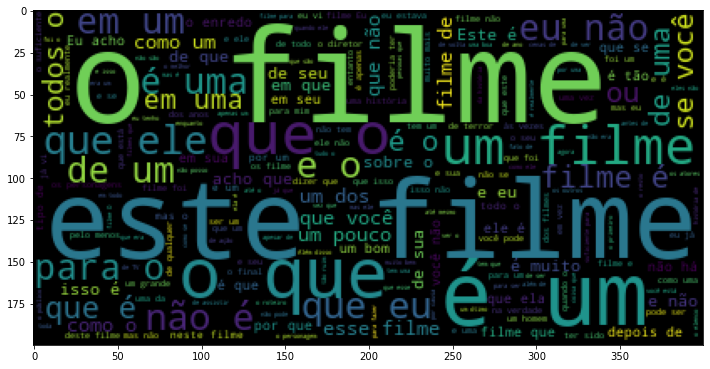

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.imshow(nuvem_palavras)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>É possível então ver as palavras em destaque, sendo que a palavra filme aparece mais de uma vez, as palavras não estão nitidas e  também aparecem palavras que não agregam muito como "um, uma, e, o". A seguir será apresentada a maneira de melhorar essa imagem.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>7.1.1 Melhorando a apresendaração da imagem</b>
    
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Primeiro mexeremos na parte do WordCloud; por padrão, uma das coisas que vem na biblioteca são a largura e a altura não da nossa imagem, mas <b>o tamanho que a Word cloud irá distribuir as palavras</b>. Por default, ela vem em 400 x 200, mas para a quantidade de palavras que temos e queremos neste corpus textual, um tamanho interessante seria 800 x 500, que venho utilizando em todas as Word clouds que faço mundo afora.
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Quando olhamos a imagem que geramos, algo que me desagrada um pouco é ter imagens muito grandes ocupando um espaço muito grande, claro, isso se relaciona à sua proporção e frequência dela em nosso texto, mas definir um tamanho máximo é melhor para termos um parâmetro um pouco melhor.

In [33]:
from wordcloud import WordCloud
%matplotlib inline

# Juntando todas as frases totalmente juntas
todas_palavras = ' '.join([texto for texto in resenha['texto_portugues']])

# criando a núvem de palavras
nuvem_palavras = WordCloud(width=800,height=500,
                           max_font_size=110,
                           collocations= False).generate(todas_palavras)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Na documentação do <b><a href='http://amueller.github.io/word_cloud/'>WordCloud</a></b>, temos a explicação do collocations, então se passamos como true, que é o default, o cálculo das frequências será feito pelo bigrama, e agora só queremos o cálculo da frequência das palavras, e não o bigrama. Já setamos o collocations = False, vamos também tirar as numerações dos eixos com plt.axis("off").m
    
<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>bigrama: Sequência de duas <i><b>palavras</b><i> consecutivas ou dois números consecutivos.

(-0.5, 799.5, 499.5, -0.5)

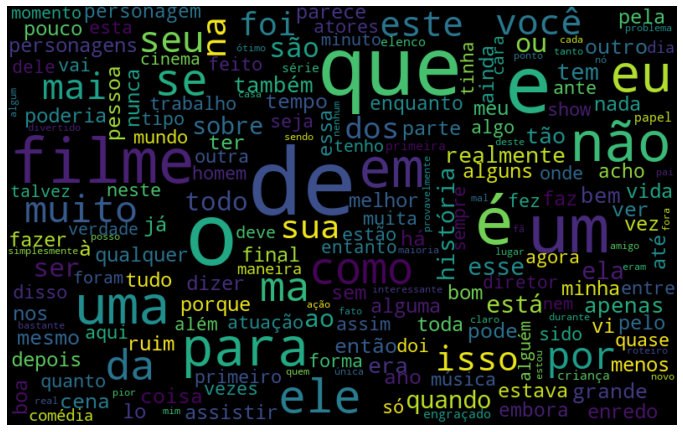

In [34]:
# Mostrando a imagem
import matplotlib.pyplot as plt

# Alterando o tamanho da imagem
plt.figure(figsize=(12,12))

# Deixando a imagem mais nítida
plt.imshow(nuvem_palavras, interpolation='bilinear')

# Retirando numeração dos eixos
plt.axis('off')

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>A imagem traz um número de palavras bem interessante, sem eixos, bem mais nítida do que a primeira imagem que geramos. De cara podemos ver algumas coisas. Lembra que quando estávamos usando bigramas tínhamos "filme" em vários lugares, com tamanho bem grande? Agora ela diminuiu um pouco, mas vejam quais palavras estão em maior destaque: "uma", "um", "que", "de".

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Será que elas são relevantes para o nosso contexto?<br>Será que elas conseguem diferenciar um sentimento ruim de um bom?</b> 
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Veja como com apenas essa visualização conseguimos alguns insights sobre o que pode ser melhorado em relação ao tratamento de nossos dados. Há outro ponto: se estamos olhando para sentimentos negativos e positivos, faz sentido olharmos para a imagem como um todo?

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>7.2 Segregando entre positivo e negativo</b></p>
<a href = 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html' style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Documentação da query</a>    

        
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Essas frases negativas e as positivas estão todas juntas, será que, para enxergarmos quais delas têm mais destaque para sentimentos positivos e quais têm para sentimentos negativos, semanticamente falando, não seria melhor separar estas visualizações? Isto é, criar uma visualização para sentimentos positivos e outra para os negativos.

In [35]:
# Buscando apenas as linhas que possuem sentimento positivo
resenha.query('sentimento == "pos"')

,id,texto_ingles,texto_portugues,sentimento,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Demos o primeiro passo em direção à criação das Word Clouds de sentimentos positivos e negativos, mas para fazê-lo, basicamente teríamos que repetir tudo o que já fizemos. Então, é muito mais interessante criarmos uma função para isso, para gerar a imagem positiva e a negativa.Vamos copiar trechos de códigos já utilizados, e vamos fazendo as alterações necessárias.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>7.2.1 Função para nuvem de palavras positivas</b></p>

In [36]:
from wordcloud import WordCloud
%matplotlib inline

def nuvem_palavras_negativas(texto,coluna_texto):
    # Juntando todas as frases totalmente juntas
    texto_negativo = texto.query('sentimento == "neg"')
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    # criando a núvem de palavras
    nuvem_palavras = WordCloud(width=800,height=500,
                               max_font_size=110,
                               collocations= False).generate(todas_palavras)
    # Mostrando a imagem
    import matplotlib.pyplot as plt

    # Alterando o tamanho da imagem
    plt.figure(figsize=(12,12))

    # Deixando a imagem mais nítida
    plt.imshow(nuvem_palavras, interpolation='bilinear')

    # Retirando numeração dos eixos
    plt.axis('off')

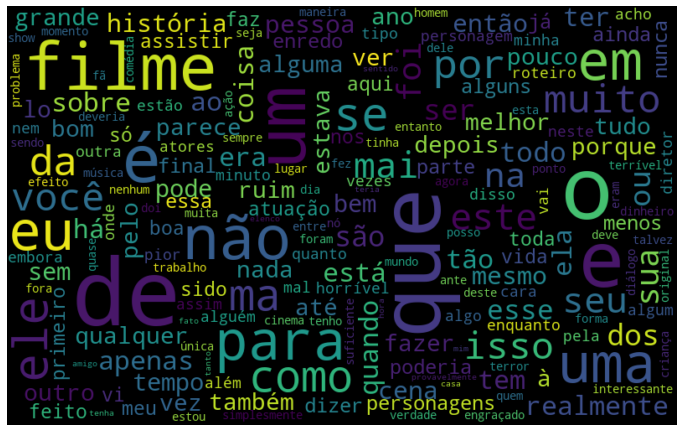

In [37]:
nuvem_palavras_negativas(resenha,'texto_portugues')

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'> Ainda aparecem palavras não muito relevantes como "de, um", porém é possível notar na nuvem negativa palavras como "ruim", "horrível". Esta é a nossa primeira visualização e nos dá uma ideia do todo.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>7.2.2 Função para nuvem de palavras negativas</b></p>

In [38]:
from wordcloud import WordCloud
%matplotlib inline

def nuvem_palavras_positivas(texto,coluna_texto):
    # Juntando todas as frases totalmente juntas
    texto_positivo= texto.query('sentimento == "pos"')
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    # criando a núvem de palavras
    nuvem_palavras = WordCloud(width=800,height=500,
                               max_font_size=110,
                               collocations= False).generate(todas_palavras)
    # Mostrando a imagem
    import matplotlib.pyplot as plt

    # Alterando o tamanho da imagem
    plt.figure(figsize=(12,12))

    # Deixando a imagem mais nítida
    plt.imshow(nuvem_palavras, interpolation='bilinear')

    # Retirando numeração dos eixos
    plt.axis('off')

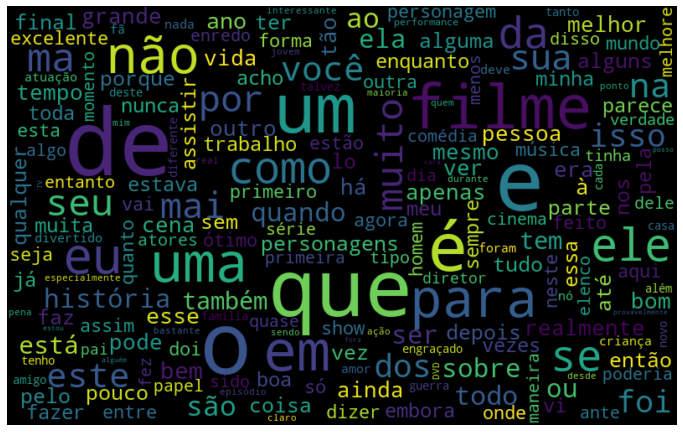

In [39]:
nuvem_palavras_positivas(resenha,'texto_portugues')

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'> Há palavras que não agregam em nada semanticamente, mas começam a surgir outras palavras que não haviam antes, como "excelente", "melhor", "amor", com conotação um pouco mais positivas. 

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>7.3 Conhecendo a biblioteca NLTK</b></p>

<a href = 'https://www.nltk.org/' style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Documentação </a>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos criar a visualização que nos ajudará a entender quais são 50, 10 ou 20 primeiras palavras com maior frequência. Para isso utilizaremos uma biblioteca Python, talvez uma das melhores que temos em Processamento de Linguagem Natural chamado NLTK (Natural Language Toolkit). É uma biblioteca muito rica e boa, que além de ter muitos dados apresenta suportes para algoritmos em português e inglês, pois diferentemente de algumas outras áreas da computação, no PLN as línguas mudam, e os algoritmos se comportam de acordo com elas.


In [40]:
import nltk 

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>7.3.1 Frequência das palavras</b></p>

In [41]:
import nltk

# Criando uma frase exemplo
exemplo_frase = ['um filme bom', 'um filme muito ruim']

# Obtendo a frequência das frases, mas queremos é a frequencia das palavras
frequencia = nltk.FreqDist(exemplo_frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme muito ruim': 1})

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vimos que precisamos separar a nossa frase, palavra por palavra. Esse processo de criar tokens e separar cada palavra da nossa frase se chama Tokenização, no PLN. E existem diversos algoritmos de <b>tokenização</b>, aqui utilizaremos, primeiramente, a separação por espaço em branco, ou seja, as palavras serão <u>divididas por um espaço em branco</u>. 
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Mais informações sobre a <a href="https://www.computersciencemaster.com.br/tokenizando-palavras-e-sentencas-em-python/">tokenização </a>

In [42]:
from nltk import tokenize

# Criando uma frase exemplo
exemplo_frase_2 = 'Bem vindo ao mundo do PLN!'

# Token com espaço em branco
token_espaco = tokenize.WhitespaceTokenizer()

# Tokenização da frase
token_frase = token_espaco.tokenize(exemplo_frase_2)

# Mostrando na tela o token
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>7.3.1 Frequência das palavras  no dataset</b></p>

In [43]:
import nltk
from nltk import tokenize

# Tokenização da frase
token_frase = token_espaco.tokenize(todas_palavras)

# Obtendo a frequência das frases, mas queremos é a frequencia das palavras
frequencia = nltk.FreqDist(token_frase)

# Mostrando na tela o token
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [44]:
# Criando um dataframe da frequência
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                              'Frequencia':list(frequencia.values())})

df_frequencia

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


<a href = "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Documentação</a>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Visualizar como um DataFrame é mais interessante do que como um dicionário,Utilizando o método <i><b>nlargest()</b></i> da biblioteca pandas, que fará a ordenação de uma quantidade determinada de palavras com maior frequência, se passarmos:
<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>columns = "Frequência"</li>
<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>n = 10, que é a quantidade de palavras que eu quero ver, no caso quero ver 10 palavras.</li>
 

In [45]:
# Ordenando as 10 palavras de maior frequência
df_frequencia_top_10 = df_frequencia.nlargest(columns='Frequencia', n=10)
df_frequencia_top_10

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>As palavras com maior frequência envolvem "de", "que", "e", "uma", e outras, que não nos agregam tanto semanticamente. De cara, já vemos que podemos remover tais palavras de uso mais comum, mas antes disso vamos criar uma visualização.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>8. Visualização de pareto- Criação e exploração</b></p>

<a href = "https://seaborn.pydata.org/generated/seaborn.barplot.html" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Documentação</a>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Gráfico de Pareto, também chamado de “diagrama de Pareto”, é uma das 7 ferramentas básicas da qualidade que visa focalizar os esforços de melhoria. Ele é útil sempre que classificações gerais de problemas (erros, defeitos, feedback de clientes, etc.) puderem ser compilados na forma de valores para estudo e ações posteriores. Nessa ferramenta, as frequências de cada causa são representadas de forma semelhante a um histograma, porém em ordem decrescente por barras e o total acumulado é representado por uma linha.</p>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos criar agora a nossa visualização, um gráfico que representará essas <i><b>N primeiras palavras com maior frequência</b></i>. Para isso, utilizaremos um gráfico de pareto. 

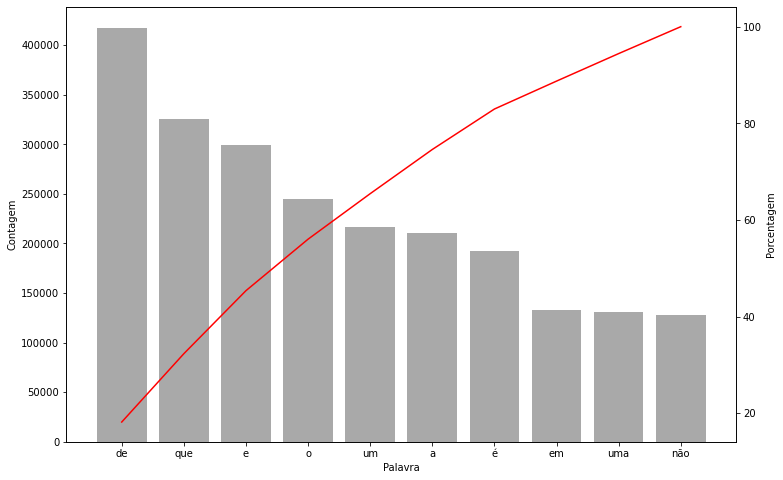

In [46]:
import seaborn as sns

# Ordenando as 10 palavras de maior frequência
df_frequencia_top_10 = df_frequencia.nlargest(columns='Frequencia', n=10)

# Tamanho do gráfico
plt.figure(figsize=(12,8))

# Gráfico de barras
ax = sns.barplot(x = 'Palavra', y = 'Frequencia', data = df_frequencia_top_10, color = 'darkgray')

# Eixo das acumaladas do gráfico de pareto
total = df_frequencia_top_10['Frequencia'].sum()
df_frequencia_top_10['Porcentagem'] = df_frequencia_top_10['Frequencia'].cumsum() / total * 100
ax2 = ax.twinx()
sns.lineplot(data=df_frequencia_top_10, x='Palavra', y='Porcentagem', color='red', sort=False, ax=ax2)

# Alterando etiquetas
ax.set(ylabel = 'Contagem')

# Mostrando
plt.show()

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>8.1 Visualização em gráfico de pareto - Criação uma função</b></p>

In [47]:
import seaborn as sns


def pareto(texto, coluna_texto, quantidade):

    # Juntando todas as frases totalmente juntas
    todas_palavras = ' '.join([texto for texto in resenha['texto_portugues']])

    # Tokenização da frase
    token_frase = token_espaco.tokenize(todas_palavras)

    # Obtendo a frequência das frases, mas queremos é a frequencia das palavras
    frequencia = nltk.FreqDist(token_frase)

    # Criando um dataframe da frequência
    df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                                  'Frequencia':list(frequencia.values())})

    # Ordenando as 10 palavras de maior frequência
    df_frequencia_top_quantidade = df_frequencia.nlargest(columns='Frequencia', n=quantidade)

    # Tamanho do gráfico
    plt.figure(figsize=(12,8))

    # Gráfico de barras
    ax = sns.barplot(x = 'Palavra', y = 'Frequencia', data = df_frequencia_top_quantidade, color = 'darkgray')

    # Alterando etiquetas
    ax.set(ylabel = 'Contagem')
    
    # Eixo das acumaladas do gráfico de pareto
    total = df_frequencia_top_quantidade['Frequencia'].sum()
    df_frequencia_top_quantidade['Porcentagem'] = df_frequencia_top_quantidade['Frequencia'].cumsum() / total * 100
    ax2 = ax.twinx()
    sns.lineplot(data=df_frequencia_top_quantidade, x='Palavra', y='Porcentagem', color='blue', sort=False, ax=ax2)

    # Mostrando
    plt.show()

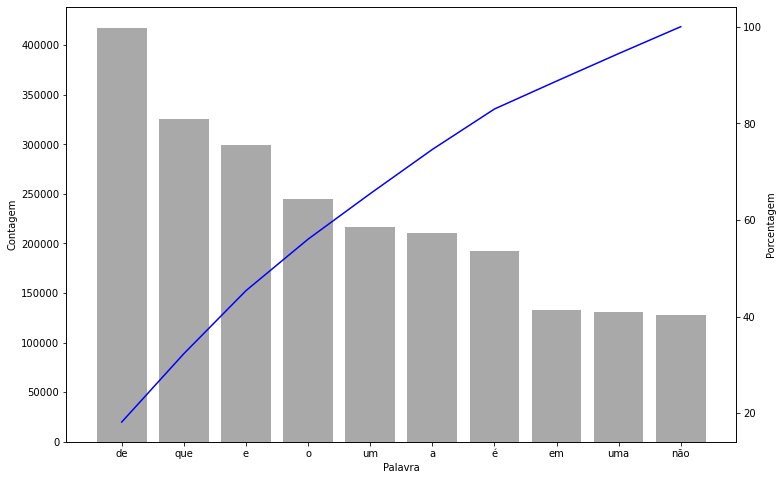

In [48]:
pareto(resenha, 'texto_portugues', 10)

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>9. Stop Words - removendo o que não agrega</b></p>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Analisando os nossos dados, a nossa visualização ficou bem bacana, percebemos que as palavras que realmente conseguem diferenciar entre sentimento ruim e bom não estão em evidência. As palavras que estão em evidência são "de", "que", "uma", que não nos agregam em nada. Mas se tivermos "filme bom", já sabemos que é algo legal, e que você gostou do filme.</p>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Essas palavras que não nos agregam pelo menos semanticamente e são irrelevantes são chamadas, em Processamento de Linguagem Natural, de Stop words, e existe uma lista padrão delas. Para podermos ter acesso a ela, importamos do nltk. Criaremos, então, palavras_irrelevantes, que será igual a nltk.corpus.stopwords.words.

In [49]:
# Retirando palavras irrelevantes do algortmo
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
palavras_irrelevantes

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Precisamos, então, fazer um tratamento de nossos dados, ou seja, pegar nosso DataFrame e, em cada frase, temos que retirar as Stop words. Faremos um <b>script de pré-processamento</b> um pouco longo, e não vai dar pra ficar quebrando ele para ficar mostrando os resultados imediatos, então vamos fazer passo a passo. Precisamos acessar cada linha do nosso DataFrame da coluna texto_portugues, precisamos ter acesso a estas opiniões.

In [50]:
resenha.head()

,id,texto_ingles,texto_portugues,sentimento,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [51]:
frase_processada = list()

for opiniao in resenha['texto_portugues']:
    
    # Se a palavra não for irrelevante ela entrará na  lista
    nova_frase = list()
    
    # separando a frase palavra por palavra
    palavras_texto = token_espaco.tokenize(opiniao)
    
    # Iterar em cada palavra do texto
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            # lista com todas as palavras da frase que não são irrelevantes
            nova_frase.append(palavra)
    
    # Juntando todas as frases
    frase_processada.append(' '.join(nova_frase))

# resenha['tratamento_1'] é a coluna texto_portugues sem as stop words, sem as palavras irrelevantes
resenha['tratamento_1'] = frase_processada


In [52]:
resenha.head()

,id,texto_ingles,texto_portugues,sentimento,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Usando resenha.head() vemos nossa frase processada. Agora, temos nossa base de dados com as colunas "id", "texto_ingles", "texto_portugues", "sentimento", "classificacao" e "tratamento_1". Mas qual é a diferença dessa última? O tratamento_1 é o nosso "texto_portugues", o texto em português, sem as Stop words.

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>9.1 Classificando sentimentos com o dataset pré-processado</b>
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'> Serão utilizadas a função que foi elaborada anteriormente.

In [53]:
# Função para classificar sentimentos, parâmetros (texto, coluna_texto, coluna_classificacao)

# Antes do tratamento
classificar_texto(resenha,'texto_portugues', 'classificacao')

65.83097452486858

In [54]:
# Depois do tratamento
classificar_texto(resenha,'tratamento_1', 'classificacao')

66.07359482410028

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'><b>9.2 Visualização em gráfico de pareto com o dataset pré-processado</b></p>

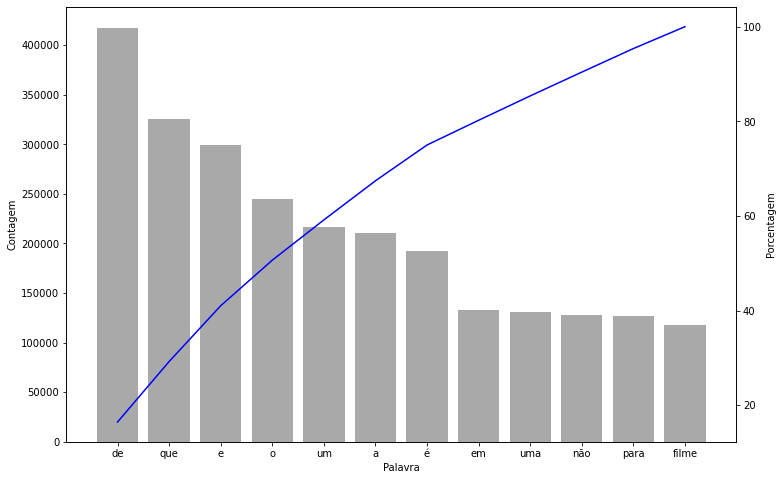

In [56]:
# Função de pareto, parâmetros (texto, coluna_texto, quantidade)
pareto(resenha, 'tratamento_1', 12)